## Parameterized Quantum Circuit(PQC):

### Data Encoding

### Quantum Circuit

In [3]:
# IMPORTS
import pennylane as qml
import numpy as np

In [4]:
N_WIRES = 12

In [10]:
dev = qml.device("default.qubit", wires=N_WIRES)


def encode_circuit(phi_ary: np.ndarray):
    for wire in range(N_WIRES):
        qml.RY(phi_ary[wire], wires=wire)


def apply_layer(layer_theta_ary: np.ndarray):
    """
    A function that applies a layer of RX and RY rotations

    Args:
        theta_ary (np.ndarray): 1D array of angles for both RX and RY gates.
    """
    theta_index = 0
    for wire in range(N_WIRES):
        qml.RX(layer_theta_ary[theta_index], wires=wire)
        theta_index += 1
        qml.RY(layer_theta_ary[theta_index], wires=wire)
        theta_index += 1


@qml.qnode(dev)
def quantum_circuit(phi_ary: np.ndarray, theta_ary: np.ndarray):
    """
    A quantum circuit that encodes the data before applying 2 layers of RX and RY rotations followed by a series of CNOT gates.

    Args:
        phi_ary (np.ndarray): Array of angles for encoding the data.
        theta_ary (np.ndarray): 2D array of angles theta_ary[layer][gate ] for both RX and RY gates.

    Returns:
        np.ndarray: The final state vector of the quantum circuit.
    """
    # Encode the data
    encode_circuit(phi_ary)

    # Apply the first layer
    # Layer 1 Entanglements
    for wire in range(0, N_WIRES - 1, 2):
        qml.CNOT(wires=[wire, wire + 1])
    # Layer 1 RX and RY rotations
    apply_layer(theta_ary[0])

    # Apply the second layer
    # Layer 2 Entanglements
    for wire in range(1, N_WIRES - 1, 2):
        qml.CNOT(wires=[wire, wire + 1])
    qml.CNOT(wires=[N_WIRES - 1, 0])
    # Layer 2 RX and RY rotations
    apply_layer(theta_ary[1])

    return qml.state()

(<Figure size 1100x1300 with 1 Axes>, <Axes: >)

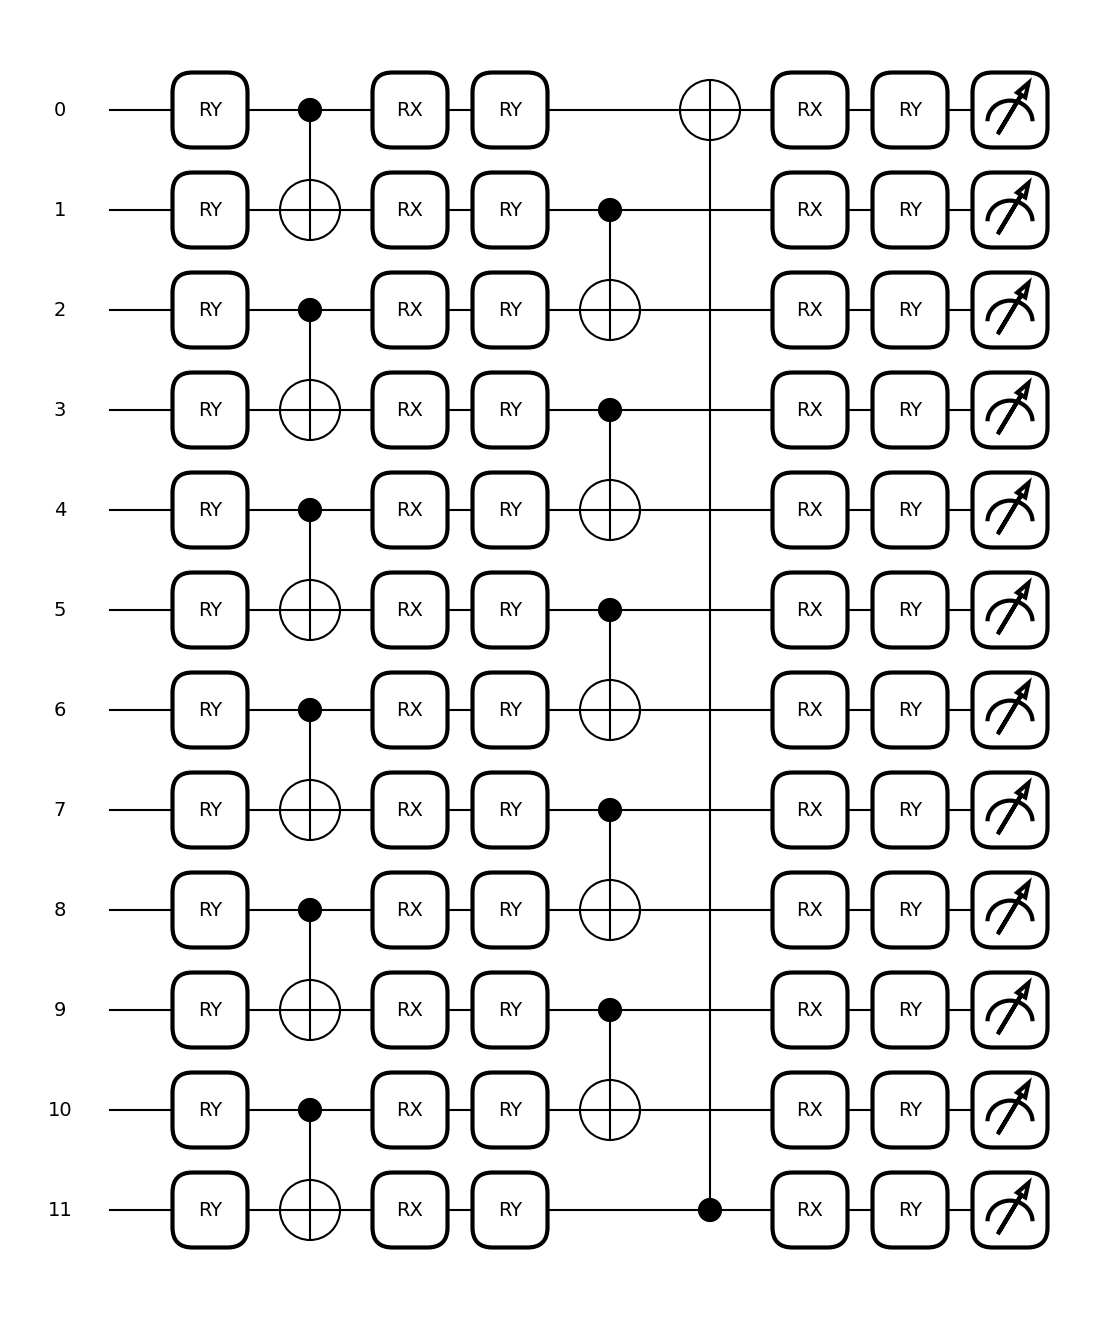

In [11]:
qml.draw_mpl(quantum_circuit)(np.zeros(N_WIRES), np.zeros((2, N_WIRES * 2)))

### Training